## The Fourier Motzkin Elimination Algorithm
This algorithm computes the orthogonal projection of a polyhedron by eliminating a given axis. <br><br>
Assume the original polyhedron is defined by $P(A,b)=\{x\in K^m:Ax\leq b\}$, where $K \subseteq R$. <br>
Its orthogonal projection is given by ${Proj}_k(P(A,b))=\{x\in K^m : x_k=0, \exists \lambda \in K : x + \lambda e^k \in P(A,b)\}$, which is the projection of the polyhedron's shadow along dimension $k$.<br><br>
This projection can be observed usgin the Fourier Motzkin Elimination (FME) Algorithm, and it can be shown that its result is again a polyhedron given by ${Proj}_k(P(A,b))=P(D,d)=\{x\in K^m:Dx\leq d, x_k=0\}$.  

In [40]:
# Imports etc.
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

from src import visualize_polyhedron

Let's start with reading-in a .txt file containing a description of a Polyhedron in the form of a concatenation of $[b,A]$. <br> This git repository already contains an example in fme_ex_polyhedron.txt that can be used.

In [19]:
# Read-In polyhedron data from .txt file
input_file = "fme_ex_polyhedron.txt"

with open(input_file, 'r') as file:
    P = np.matrix([[float(num) for num in line.split(' ')] for line in file])
    
b = P[:, 0]
A = P[:, 1:]

print("Read-in polyhedron.")
print(f"Shape of A is {A.shape}")
print(f"Shape of b is {b.shape}")

Read-in polyhedron.
Shape of A is (4, 2)
Shape of b is (4, 1)


Now we want to visualize the loaded polyhedron using matplotlib.

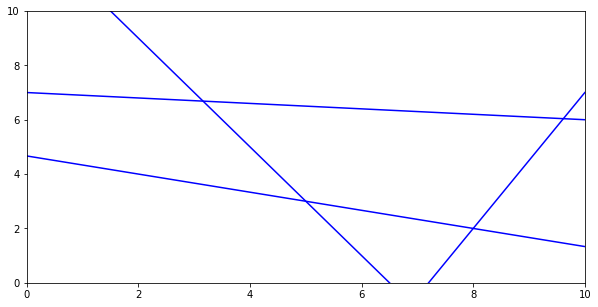

In [41]:
visualize_polyhedron(A_mat=A, b_mat=b)

In [34]:
# Main algorithm
def fme(dim: int):
    k = dim - 1
    """ Fourier Motzkin Elemination
    
    :param dim: The index (axis) to be eliminated.
    :return: Projected polyhedron
    """
    
    # We first partition our set of indices of A
    C_k_0 = np.where(A[:,k] == 0)[0]
    C_k_minus = np.where(A[:,k] < 0)[0]
    C_k_plus = np.where(A[:,k] > 0)[0]
    
    D = np.zeros(shape=(A.shape[0], A.shape[1]))
    d = np.zeros(shape=(b.shape[0]))
    
    # Iterate over these sets
    i = 0
    for ind in C_k_0:
        D[i,:] = A[i,:]
        d[i] = b[i]
        i += 1
    for (s, t) in list(product(C_k_minus, C_k_plus)): 
        D[i, :] = A[t,k]*A[s,:] - A[s,k]*A[t,:]
        d[i] = A[t,k]*b[s] - A[s,k]*b[t]
        i += 1
        
    # Return projected polyhedron 
    return D, d.reshape(-1, 1)

In [43]:
# Run algorithm and write results to .txt file
D, d = fme(dim=1)
P = np.matrix(np.concatenate((d, D), axis=1))
with open(input_file[:-4]+'_results.txt','wb') as file:
    for line in P:
        np.savetxt(file, line, fmt='%.0f')
print("Saved projected polyhedron.")
print(f"Shape of D is {D.shape}")
print(f"Shape of d is {d.shape}")

Saved projected polyhedron.
Shape of D is (4, 2)
Shape of d is (4, 1)


In [44]:
D

array([[  0. ,   0.7],
       [  0. , -17. ],
       [  0. ,   3.8],
       [  0. , -18. ]])

C:\Users\yannik\Discrete-Optimization-In-Python\src\visualization\visualize_polyhedra.py:22: RuntimeWarning: divide by zero encountered in true_divide
  x1 = (b_mat[i] - A_mat[i,0]*x0)/A_mat[i,1]
C:\Users\yannik\Discrete-Optimization-In-Python\src\visualization\visualize_polyhedra.py:22: RuntimeWarning: invalid value encountered in true_divide
  x1 = (b_mat[i] - A_mat[i,0]*x0)/A_mat[i,1]


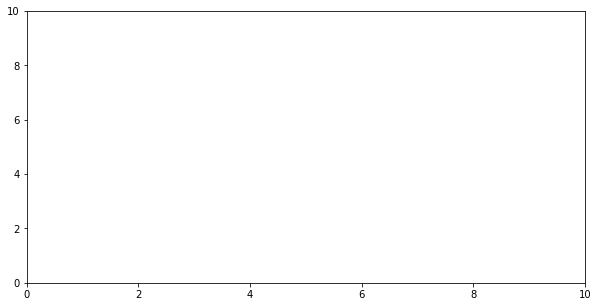

In [42]:
visualize_polyhedron(D, d)